### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Load Dataframe

In [2]:
df = pd.read_pickle('data.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nationality                                     4424 non-null   category
 8   Mother_qualification                            4424 non-null   category
 9   Father_qualification          

In [4]:
df.head()

Marital status Application mode Application order Course  \
0              1               17                 5    171   
1              1               15                 1   9254   
2              1                1                 5   9070   
3              1               17                 2   9773   
4              2               39                 1   8014   

  Daytime/evening attendance Previous qualification  \
0                          1                      1   
1                          1                      1   
2                          1                      1   
3                          1                      1   
4                          0                      1   

   Previous qualification (grade) Nationality Mother_qualification  \
0                           122.0           1                   19   
1                           160.0           1                    1   
2                           122.0           1                   37   
3                           122.0           1                   38   
4                           100.0           1                   37   

  Father_qualification  ... Curricular units 2nd sem (credited)  \
0                   12  ...                                   0   
1                    3  ...                                   0   
2                   37  ...                                   0   
3                   37  ...                                   0   
4                   38  ...                                   0   

  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  \
0                                   0                                       0   
1                                   6                                       6   
2                                   6                                       0   
3                                   6                                      10   
4                                   6                                       6   

  Curricular units 2nd sem (approved) Curricular units 2nd sem (grade)  \
0                                   0                         0.000000   
1                                   6                        13.666667   
2                                   0                         0.000000   
3                                   5                        12.400000   
4                                   6                        13.000000   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              10.8   
1                                              0              13.9   
2                                              0              10.8   
3                                              0               9.4   
4                                              0              13.9   

  Inflation rate   GDP    Target  
0            1.4  1.74   Dropout  
1           -0.3  0.79  Graduate  
2            1.4  1.74   Dropout  
3           -0.8 -3.12  Graduate  
4           -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [5]:
# For numerical columns
numerical_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
                     'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
                     'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
                     'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
                     'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
                     'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
                     'Unemployment rate', 'Inflation rate', 'GDP']

In [6]:
# For categorical columns
categorical_columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
                       'Previous qualification', 'Nationality', 'Mother_qualification','Father_qualification', 'Mother_occupation', 'Father_occupation', 'Displaced', 'Educational special needs', 
                       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

### Univariate Analysis

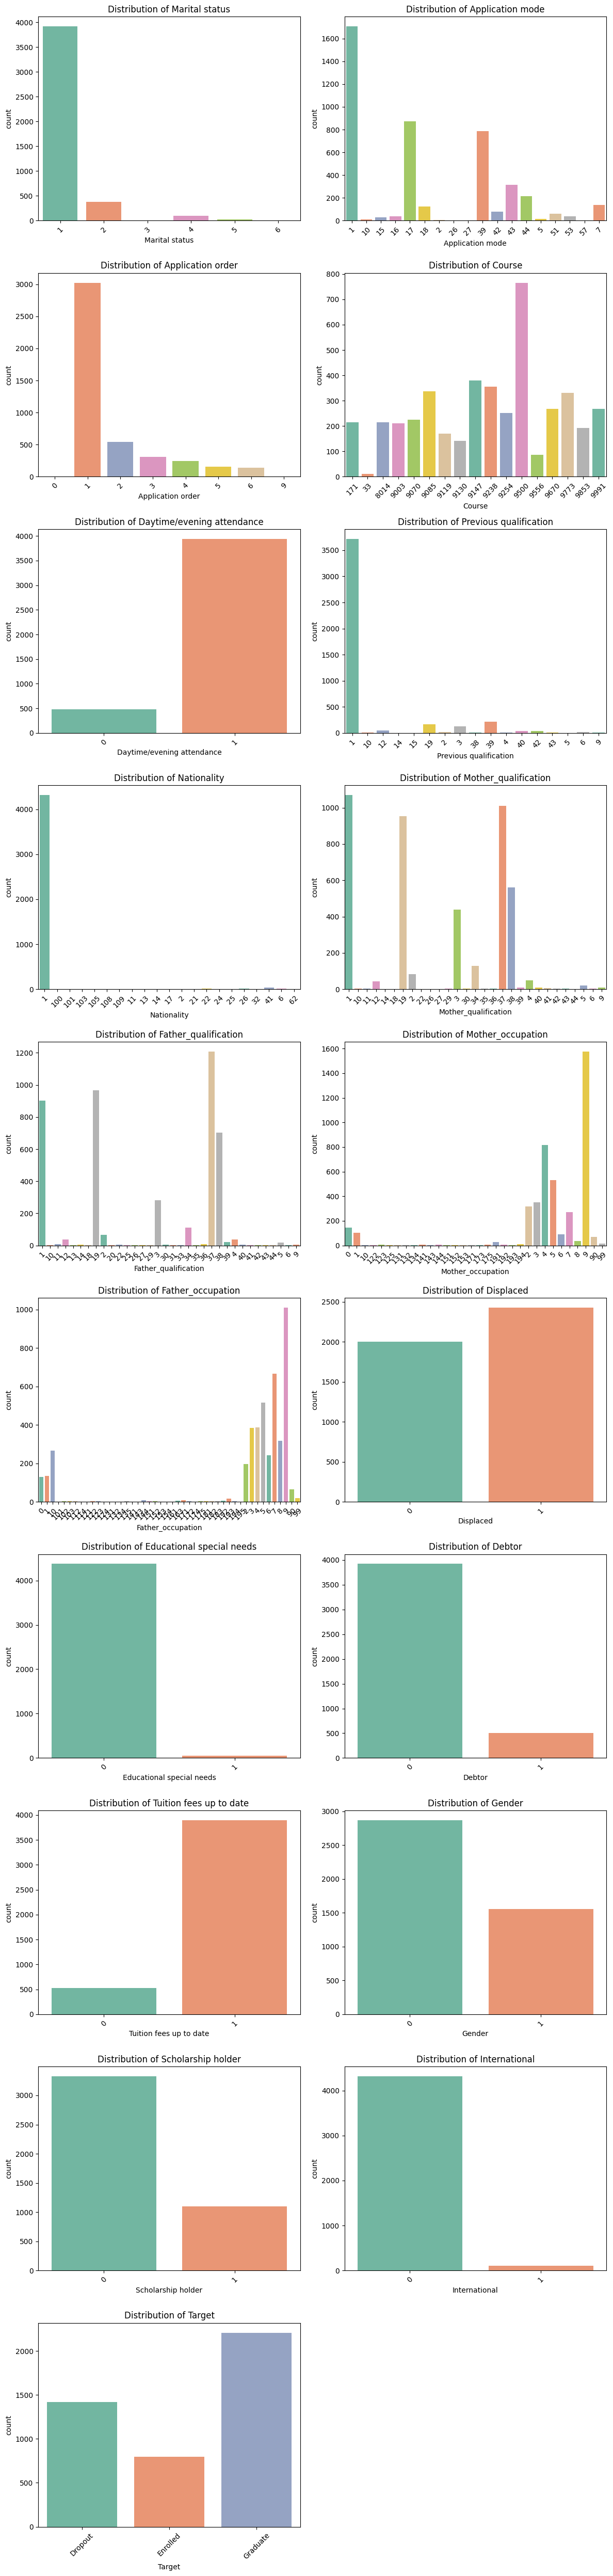

In [7]:
# Plot categorical features
# Number of columns and rows needed
num_cols = 2
num_features = len(categorical_columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Adjust the figure size based on the number of rows and columns
plt.figure(figsize=(12, num_rows * 5))  # Adjust height to fit all rows

for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot grid
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
# Define number of columns
num_cols = 2
num_features = len(numerical_columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate rows needed

# Create a subplot figure with specified rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numerical_columns)

# Loop through each numerical column and add a histogram to the subplot
for i, col in enumerate(numerical_columns):
    row = (i // num_cols) + 1
    col_index = (i % num_cols) + 1
    
    fig.add_trace(
        go.Histogram(
            x=df[col], 
            nbinsx=15, 
            marker=dict(
                color='skyblue', 
                line=dict(color='black', width=1)  # Thin black line around each histogram
            ),
            name=col
        ),
        row=row, col=col_index
    )

# Update layout for better appearance
fig.update_layout(
    height=num_rows * 400,  # Adjust height based on the number of rows
    title_text="Distributions of Numerical Features",
    showlegend=False
)

# Show the figure
fig.show()


In [10]:
# Define number of columns
num_cols = 2
num_features = len(numerical_columns)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate rows needed

# Create a subplot figure with specified rows and columns
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numerical_columns)

# Loop through each numerical column and add a box plot to the subplot
for i, col in enumerate(numerical_columns):
    row = (i // num_cols) + 1
    col_index = (i % num_cols) + 1
    
    fig.add_trace(
        go.Box(
            y=df[col],
            marker=dict(
                color='skyblue',
                line=dict(color='black', width=1)
            ),
            boxmean='sd'  # Optionally, show the mean and standard deviation
        ),
        row=row, col=col_index
    )

# Update layout for better appearance
fig.update_layout(
    height=num_rows * 400,  # Adjust height based on the number of rows
    title_text="Distributions of Numerical Features",
    showlegend=False
)

# Show the figure
fig.show()


### Bi-variate Analysis

In [11]:
# Define the pairs of variables
num_pairs = [('Previous qualification', 'Admission grade'),
             ('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'),
             ('Previous qualification (grade)', 'Curricular units 2nd sem (grade)'),
             ('Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)')]

# Define color palette
color_palette = {'Dropout': 'red', 'Enrolled': 'blue', 'Graduate': 'green'}

# Set up the figure size and layout
num_cols = 2
num_rows = len(num_pairs) // num_cols + (len(num_pairs) % num_cols > 0)  # Number of rows needed

# Create a subplot figure with specified rows and columns
fig = sp.make_subplots(
    rows=num_rows, 
    cols=num_cols, 
    subplot_titles=[f'{var1} vs {var2}' for var1, var2 in num_pairs]
)

# Loop through each pair and add a scatter plot to the subplot
for i, (var1, var2) in enumerate(num_pairs):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    
    # Create scatter plot
    fig.add_trace(
        go.Scatter(
            x=df[var1],
            y=df[var2],
            mode='markers',
            marker=dict(
                color=df['Target'].map(color_palette),  # Map target to colors
                size=5,  # Adjust size of markers
                opacity=0.7
            ),
            text=df['Target'],  # Show target in hover text
            name='Target'
        ),
        row=row, col=col
    )

# Update layout for better appearance, including reducing title text size
fig.update_layout(
    height=num_rows * 400,  # Adjust height based on the number of rows
    title_text="Scatter Plots of Variable Pairs",
    showlegend=True,
    annotations=[dict(
        x=anno['x'], y=anno['y'], text=anno['text'], showarrow=False, font=dict(size=10))
        for anno in fig['layout']['annotations']]
)

# Show the figure
fig.show()


The provided plot consists of four subplots which are all scatter plots that analyze various educational metrics related to students' previous qualifications and their performance in curricular units. 
Here's a breakdown of each plot:

**Previous Qualification vs. Admission Grade (Top Left):**
This plot shows the relationship between students' previous qualifications and their admission grades.
The x-axis represents the previous qualification, while the y-axis indicates the admission grade.
Different colors represent student categories: red for dropouts, blue for enrolled, and green for graduates.
The data points are clustered at specific qualification levels, suggesting that certain qualifications correlate with specific admission grades.

**Curricular Units 1st Sem (Grade) vs. Curricular Units 2nd Sem (Grade) (Top Right):**
This scatter plot compares grades from the first semester to grades from the second semester.
The x-axis represents the first semester grades, and the y-axis represents the second semester grades.
The trend indicates a positive correlation, where higher grades in the first semester tend to align with higher grades in the second semester.
Again, the color coding helps differentiate between dropouts, enrolled, and graduates.

**Previous Qualification (Grade) vs. Curricular Units 2nd Sem (Grade) (Bottom Left):**
This plot examines the relationship between previous qualification grades and the grades achieved in the second semester.
The x-axis shows the previous qualification grades, while the y-axis displays the second semester grades.
The distribution of points suggests that students with higher previous qualification grades generally perform better in the second semester.

**Curricular Units 1st Sem (Credited) vs. Curricular Units 1st Sem (Enrolled) (Bottom Right):**
This plot illustrates the relationship between the number of curricular units credited in the first semester and the number of units enrolled.
The x-axis represents the units enrolled, while the y-axis shows the units credited.
The data points form a clear upward trend, indicating that students who enroll in more units tend to have more credited units, with color coding to show the different student categories.

Overall, these plots provide insights into how previous qualifications and performance in curricular units relate to student outcomes, highlighting trends and potential areas for further investigation in educational performance.



### Multivariate Analysis

In [12]:
import plotly.graph_objects as go
import numpy as np

# Filter out numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap with annotations
heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    colorbar=dict(title='Correlation'),
    showscale=True,
    text=np.round(corr_matrix.values, 2),  # Annotations (rounded to 2 decimal places)
    hoverinfo='text',
    texttemplate="%{text}"  # Display annotations on the heatmap
)

# Create the figure
fig = go.Figure(data=[heatmap])

# Customize layout
fig.update_layout(
    title='Correlation Matrix Heatmap',
    title_x=0.5,  # Center the title
    width=800, height=800,  # Adjust the size
    xaxis=dict(tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns)
)

# Show the heatmap
fig.show()

**Variables:** The matrix includes several variables related to academic performance and economic indicators:

*Previous qualification (grade)
*Admission grade
*Age at enrollment
*Curricular units for the first and second semesters (credited, enrolled, evaluated, approved, and graded)
*Economic indicators like unemployment rate, inflation rate, and GDP.

**Correlation Coefficients:** Each cell in the matrix shows the correlation coefficient between two variables, ranging from -1 to 1:
1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.
Color Coding: The heatmap uses a color gradient to represent the strength and direction of correlations:

**Observations:**
**Strong Correlations:**
There are strong positive correlations among various curricular units, particularly within the same semester (e.g., curricular units 1st sem (credited) and 1st sem (evaluated)).
The correlation between "Curricular units 2nd sem (credited)" and "Curricular units 2nd sem (evaluated)" is also notably high.

**Weak or Negative Correlations:**
The correlation between "Previous qualification (grade)" and "Age at enrollment" is weak and slightly negative.
Economic indicators like the unemployment rate and inflation rate show weak correlations with academic variables.

In [13]:
# Define the target variable
y = df['Target']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define numerical and categorical columns
numerical_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
                     'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
                     'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
                     'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
                     'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
                     'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
                     'Unemployment rate', 'Inflation rate', 'GDP']

categorical_columns = ['Marital status', 'Application mode', 'Application order', 'Course', 
                       'Daytime/evening attendance', 'Previous qualification', 'Nationality', 
                       'Mother_qualification', 'Father_qualification', 'Mother_occupation', 
                       'Father_occupation', 'Displaced', 'Educational special needs', 'Debtor', 
                       'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

In [14]:
# Scaling the numerical columns
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Concatenate scaled numerical columns with the already processed categorical columns
X_final = pd.concat([pd.DataFrame(X_scaled_numerical, columns=numerical_columns), df[categorical_columns].reset_index(drop=True)], axis=1)

In [15]:
# PCA Implementation
# PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_final)

# PCA for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_final)

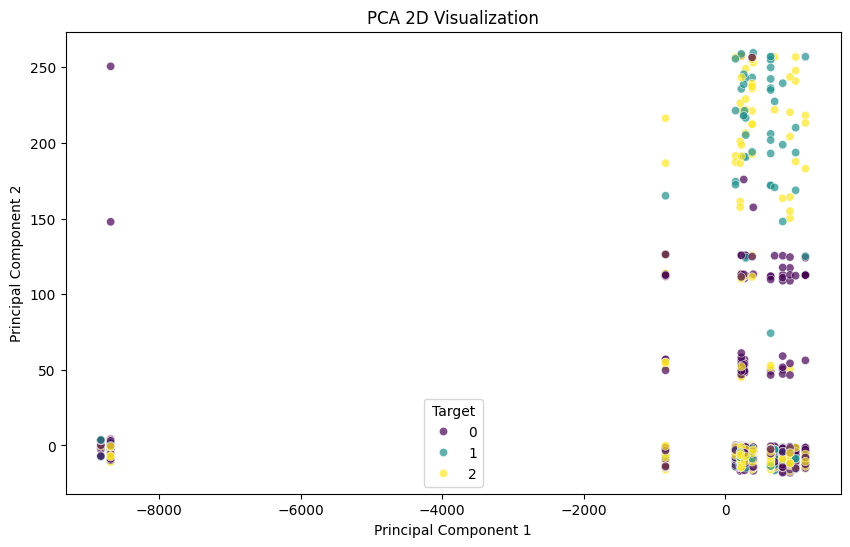

In [16]:
# 2D Plot
df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Target'] = y_encoded

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Target', palette='viridis', alpha=0.7)
plt.title('PCA 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()

The plot is a 2D visualization of Principal Component Analysis (PCA) results, displaying the relationship between two principal components derived from a dataset. 

**Axes:**
The x-axis represents "Principal Component 1," while the y-axis represents "Principal Component 2." These components are linear combinations of the original features in the dataset, capturing the most variance.

**Data Points:**
The plot contains various data points, each colored according to a target variable with three distinct classes (0, 1, and 2).
The colors are represented in the legend:
Purple for target 0
Cyan for target 1
Yellow for target 2

**Distribution:**
Most data points are clustered in the lower left quadrant, indicating that the majority of the data falls within a certain range of the principal components.
There are a few outliers or extreme values, particularly in the upper regions of the plot, which may represent unique cases or anomalies in the dataset.
Interpretation:

The clustering of points suggests that the different target classes may have distinct characteristics, as indicated by their separation in the PCA space.
The presence of outliers could indicate variability or noise in the data.

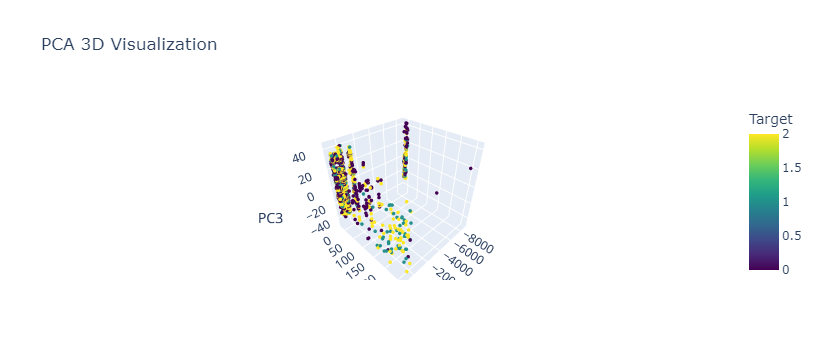

In [21]:
# Convert the PCA 3D array into a DataFrame
df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Target'] = y_encoded

# Create 3D scatter plot using Plotly
fig = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3', color='Target',
                    title='PCA 3D Visualization', color_continuous_scale='viridis')

# Update marker size
fig.update_traces(marker=dict(size=2))

# Show the plot
fig.show()

The provided plot is a 3D visualization of Principal Component Analysis (PCA) results, illustrating the relationships among three principal components derived from a dataset. Here are the key features of the plot:

**Axes:**
The x-axis represents "PC1" (Principal Component 1).
The y-axis represents "PC2" (Principal Component 2).
The z-axis represents "PC3" (Principal Component 3).
These components are linear combinations of the original features, capturing the most variance in the data.

**Data Points:**
The plot contains various data points, each colored according to a target variable, which appears to have a range from 0 to 2.
The color gradient indicates different target values, with a color bar on the right showing the mapping from color to target value.

**Distribution:**
The data points are distributed throughout the 3D space, with some clustering observed in certain areas.
The presence of points in various regions suggests that the dataset has a diverse range of characteristics.
Interpretation:

The clustering of points may indicate that certain target classes have distinct features, as evidenced by their spatial separation in the PCA space.